In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")
dfc= pd.get_dummies(df, columns=['Критерий'])
def to_datetime(row):
    return datetime.strptime(row['Дата'], '%d.%m.%Y')

In [4]:
p = dfc[['Дата', 'Значение']][dfc['Критерий_views'] == 1]
p['Дата'] = p.apply(to_datetime, axis=1).dt.strftime('%Y')
py = p.groupby(['Дата'])['Значение'].sum()
print("Задание 1: Статистика посещения группы\n",py)

Задание 1: Статистика посещения группы
 Дата
2016     7199
2017    11872
2018     7055
2019     8754
2020     1444
Name: Значение, dtype: int64


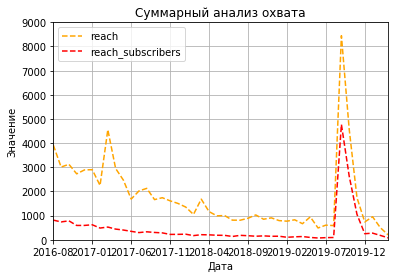

In [23]:
import pylab
a = dfc[['Дата','Значение']][dfc['Критерий_reach'] == 1]
a['Дата'] = a.apply(to_datetime, axis=1).dt.strftime('%Y-%m')
au = a.groupby(['Дата'])['Значение'].sum()
f = dfc[['Дата','Значение']][dfc['Критерий_reach_subscribers'] == 1]
f['Дата'] = f.apply(to_datetime, axis=1).dt.strftime('%Y-%m')
fo = f.groupby(['Дата'])['Значение'].sum()
plt.title('Суммарный анализ охвата')
plt.xlabel('Дата')
plt.ylabel('Значение')
au.plot(label="reach", linestyle='--',color = 'orange')
fo.plot(label = "reach_subscribers", linestyle='--',color = 'red')
pylab.ylim(0, 9000)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [8]:
gender = dfc[['Дата', 'Значение','Парам. №1']][dfc['Критерий_gender'] == 1]
gender1 = gender.groupby(['Парам. №1'])['Значение'].sum()
print("Задание 3: Провести анализ демографии по полу:\n",gender1 )

Задание 3: Провести анализ демографии по полу:
 Парам. №1
Ж    10063
М    12637
Name: Значение, dtype: int64


In [9]:
age = dfc[['Парам. №1', 'Значение']][dfc['Критерий_age'] == 1]
age1 = age.groupby(['Парам. №1'])['Значение'].sum()
print("Задание 3: Провести анализ демографии по возрасту аудитории:\n",age1 )

Задание 3: Провести анализ демографии по возрасту аудитории:
 Парам. №1
1-18      741
18-21    3046
21-24    2560
24-27    1751
27-30    2419
30-35    3466
35-45    2402
45+      2350
Name: Значение, dtype: int64


In [10]:
country = dfc[['Парам. №1','Значение']][dfc['Критерий_countries'] == 1]
country1 = country.groupby(['Парам. №1'])['Значение'].sum()
print("Задание 3: Провести анализ демографии по стране:\n",country1 )

Задание 3: Провести анализ демографии по стране:
 Парам. №1
Австралия                       1
Австрия                         7
Азербайджан                    19
Аргентина                       1
Армения                         8
                               ..
Шри-Ланка                       1
Эстония                        28
Южная Корея                     3
Южно-Африканская Республика     1
Япония                          2
Name: Значение, Length: 70, dtype: int64


In [12]:
get_feedback = dfc[['Дата','Парам. №1','Значение']][dfc['Критерий_feedback'] == 1]
get_feedback['Дата'] = get_feedback.apply(to_datetime, axis=1).dt.strftime('%Y-%m')
print(get_feedback['Парам. №1'].value_counts())

Нравится              683
Рассказали друзьям    291
Комментарии            91
Упоминания              1
Name: Парам. №1, dtype: int64


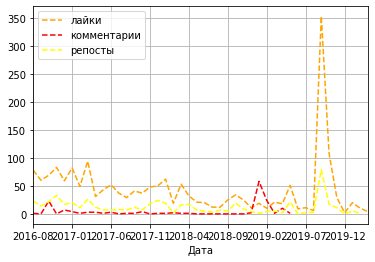

In [22]:
like = get_feedback[get_feedback['Парам. №1'] == 'Нравится'].groupby(['Дата'])['Значение'].sum().plot(label="лайки", linestyle='--',color = 'orange')
comment = get_feedback[get_feedback['Парам. №1'] == 'Комментарии'].groupby(['Дата'])['Значение'].sum().plot(label="комментарии", linestyle='--',color = 'red')
repost = get_feedback[get_feedback['Парам. №1'] == 'Рассказали друзьям'].groupby(['Дата'])['Значение'].sum().plot(label="репосты", linestyle='--',color = 'yellow')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [25]:
print('Задание 5: Наиболее популярна группа для людей в возрасте: ',str(age1.sort_values(ascending=False).index[1]) , 'лет и', str(age1.sort_values(ascending=False).index[0]), 'лет')
print('Задание 5: Наиболее популярна группа для людей, которые живут в: ', str(country1.sort_values(ascending=False).index[0]))

Задание 5: Наиболее популярна группа для людей в возрасте:  18-21 лет и 30-35 лет
Задание 5: Наиболее популярна группа для людей, которые живут в:  Россия


In [24]:
print("Задание 5: Проведя анализ мы узнали, что по возрастному и демографическому показателям группа пользуется популярностью среди активных пользователей из России моложе 30 лет, исходя из этого мы можем сделать вывод, что группа подходит для продвижения нового товара")

Задание 5: Проведя анализ мы узнали, что по возрастному и демографическому показателям группа пользуется популярностью среди активных пользователей из России моложе 30 лет, исходя из этого мы можем сделать вывод, что группа подходит для продвижения нового товара
